In [1]:
scipy==1.8.0

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

import warnings
warnings.filterwarnings("ignore")

In [2]:
G = nx.read_adjlist('facebook_social_graph.adjlist')

### Initial Visualization

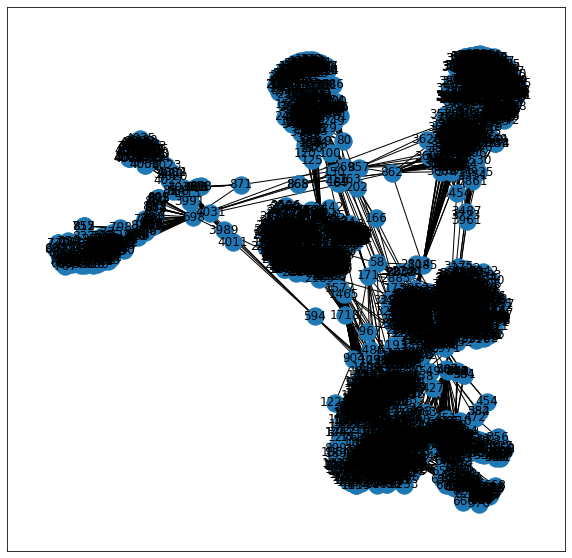

In [3]:
nx.(G)

### Adding Labels

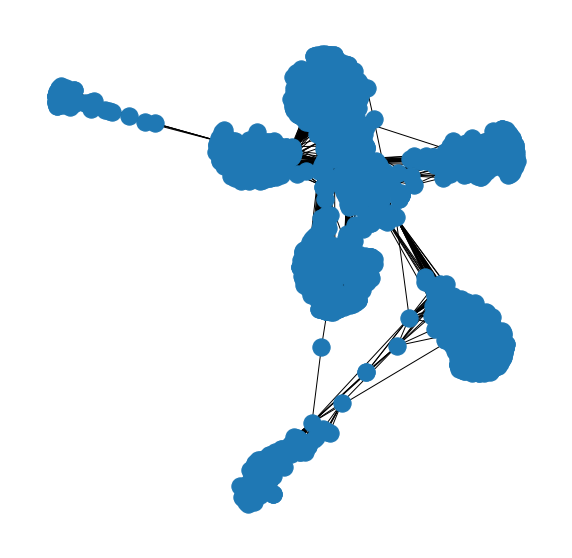

In [4]:
plt.axis('off')
nx.draw_networkx(G)

### Setting Node Size

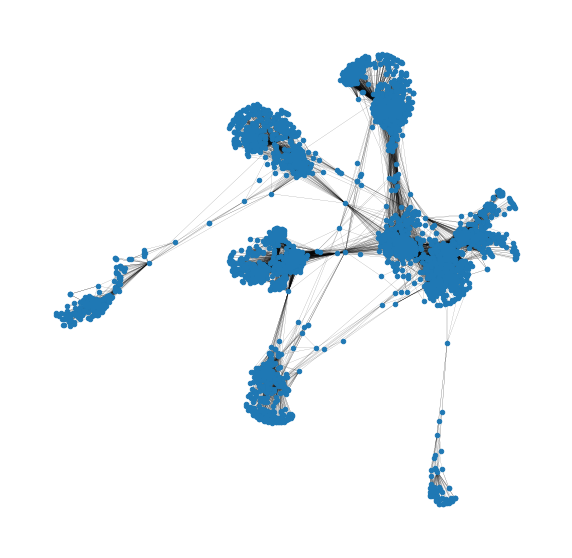

In [5]:
plt.axis('off')
nx.draw_networkx(G)

### Adding Sprint Layout

The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

In [6]:
pos = nx.(G)

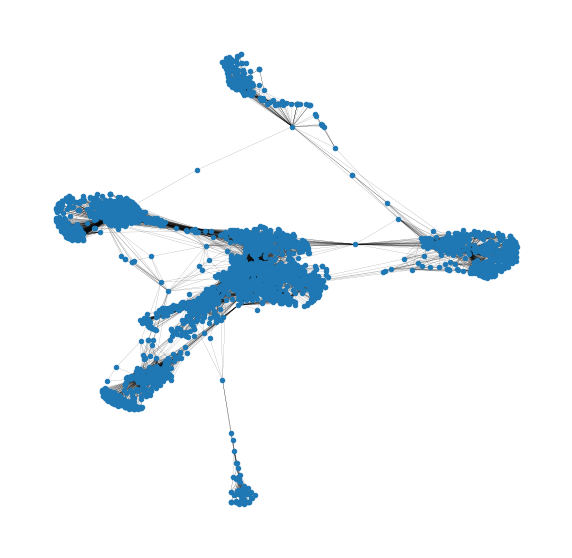

In [7]:
plt.axis('off')
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=20, width=0.1)

### Changing the size of the node using correlation

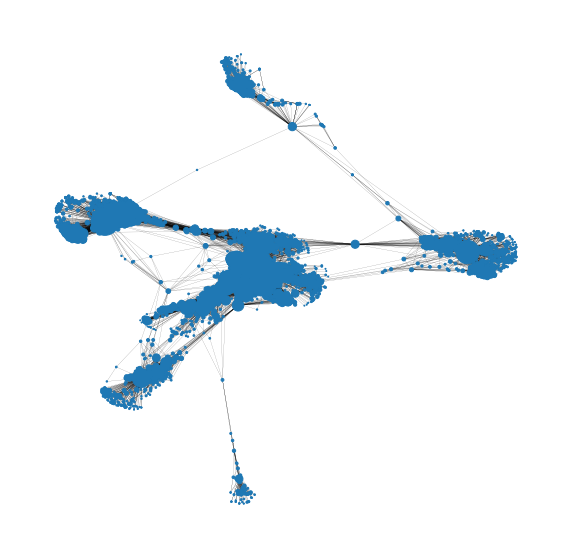

In [8]:
plt.axis('off')
node_sizes = list(map(lambda node: node[1], list(G.)))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, width=0.1)

### Changing the size of the node and color using correlation

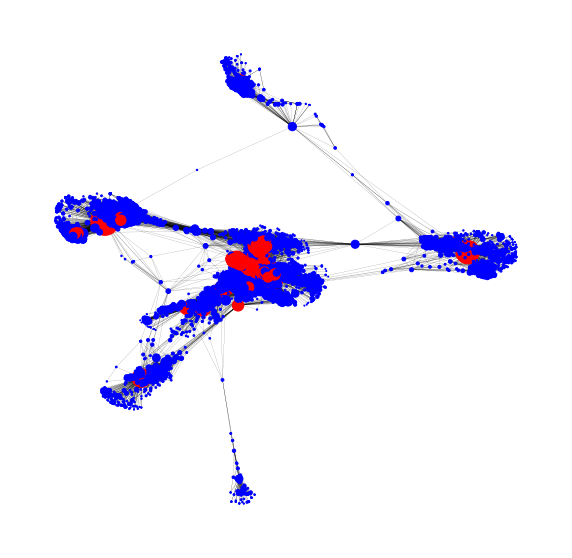

In [10]:
plt.axis('off')
node_sizes = list(map(lambda node: node[1], list(G.)))
node_colors = list(map(lambda degree: 'b' if degree < 100 else 'r', node_sizes))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, node_color=node_colors, width=0.1)

In [11]:
help(nx.draw_networkx)

Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.
    
    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    arrows : bool or None, optional (default=None)
        If `None`, directed graphs draw arrowheads with
        `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
        via `~matplotlib.collections.LineCollection` for speed.
        If `True`, draw arrowheads with

In [12]:
!pip install bokeh

In [13]:
import networkx as nx
from bokeh.io import show, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle
from bokeh.models.graphs import from_networkx

In [14]:
G = nx.read_adjlist('facebook_social_graph.adjlist')

plot = Plot(plot_width=700, plot_height=500,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Facebook Social Network"

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=5)

graph_renderer.edge_renderer.glyph = MultiLine(
    line_alpha=0.4, 
    line_width=0.4
)

plot.renderers.append(graph_renderer)

In [15]:
output_notebook()
show(plot)

Loading BokehJS ...

### Adding Tools

In [17]:
from bokeh.models import BoxZoomTool, ResetTool, PanTool

plot.add_tools(PanTool(), BoxZoomTool(), ResetTool())

In [18]:
output_notebook()
show(plot)

Loading BokehJS ...

### Change the size of the nodes

In [19]:
nx.set_node_attributes(G, dict(G.degree), 'node_size')

plot = Plot(plot_width=700, plot_height=500,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Facebook Social Network"

plot.add_tools(PanTool(), BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size='node_size')

graph_renderer.edge_renderer.glyph = MultiLine(
    line_alpha=0.4, 
    line_width=0.4
)

plot.renderers.append(graph_renderer)

In [20]:
output_notebook()
show(plot)

Loading BokehJS ...

### Normalization of the node size

In [22]:
size = 0.5
l = 0.5
def box_cox_normalization(node_size):
    from math import ceil
    from math import pow
    
    compressed_point = (pow(node_size, l) - 1) / l 
    return ceil(size*compressed_point)

In [23]:
new_sizes = dict(map(lambda node: (node[0], box_cox_normalization(node[1])), dict(G.degree).items()))

nx.set_node_attributes(G, dict(G.degree), 'connections')
nx.set_node_attributes(G, new_sizes, 'node_size')

plot = Plot(plot_width=700, plot_height=500,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Facebook Social Network"

from bokeh.models import HoverTool
plot.add_tools(PanTool(), BoxZoomTool(), ResetTool(), HoverTool(tooltips=[("connections", "@connections")]))

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size='node_size')

graph_renderer.edge_renderer.glyph = MultiLine(
    line_alpha=0.4, 
    line_width=0.4
)

plot.renderers.append(graph_renderer)

In [24]:
output_notebook()
show(plot)

Loading BokehJS ...

### Set color using influence count

In [ ]:
new_sizes = dict(map(lambda node: (node[0], box_cox_normalization(node[1])), dict(G.degree).items()))
colors = dict(map(lambda node: (node[0], 'red' if node[1] > 500 else 'blue'), dict(G.degree).items()))

nx.set_node_attributes(G, dict(G.degree), 'connections')
nx.set_node_attributes(G, new_sizes, 'node_size')
nx.set_node_attributes(G, colors, 'node_color')

plot = Plot(plot_width=700, plot_height=500,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Facebook Social Network"

from bokeh.models import HoverTool
plot.add_tools(PanTool(), BoxZoomTool(), ResetTool(), HoverTool(tooltips=[("connections", "@connections")]))

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size='node_size', fill_color='node_color')

graph_renderer.edge_renderer.glyph = MultiLine(
    line_alpha=0.4, 
    line_width=0.4
)

plot.renderers.append(graph_renderer)

In [ ]:
output_notebook()
show(plot)

In [21]:
help(Circle)
help(MultiLine)

Help on class Circle in module bokeh.models.glyphs:

class Circle(Marker)
 |  Circle(*args, **kwargs) -> 'Model'
 |  
 |  Render circle markers. 
 |  
 |  Example
 |  -------
 |  
 |  .. bokeh-plot:: ../../examples/reference/models/Circle.py
 |      :source-position: below
 |  
 |  Method resolution order:
 |      Circle
 |      Marker
 |      bokeh.models.glyph.XYGlyph
 |      bokeh.models.glyph.LineGlyph
 |      bokeh.models.glyph.FillGlyph
 |      bokeh.models.glyph.HatchGlyph
 |      bokeh.models.glyph.Glyph
 |      bokeh.model.model.Model
 |      bokeh.core.has_props.HasProps
 |      bokeh.model.util.HasDocumentRef
 |      bokeh.util.callback_manager.PropertyCallbackManager
 |      bokeh.util.callback_manager.EventCallbackManager
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  radius
 |      The radius values for circle markers (in |data units|, by default).
 |      
 |      .. note::
 |          Circle markers are slightly unusual in that they support spe